In [5]:
import networkx as nx
import random

def prim_algorithm(graph):
    n = len(graph.nodes)
    visited = [False] * n
    min_cost = 0
    edges = []
    visited[0] = True
    ne = 1
    while ne < n:
        min_edge = (float('inf'), None, None) # (weight, u, v)

        for u in range(n):
            if visited[u]:
                for v, weight in graph[u].items():
                    if not visited[v] and weight['weight'] < min_edge[0]:
                        min_edge = (weight['weight'], u, v)
        if min_edge[1] is not None and min_edge[2] is not None:
            u, v = min_edge[1], min_edge[2]
            edges.append((u, v, min_edge[0]))
            ne += 1
            min_cost += min_edge[0]
            visited[v] = True
    return edges, min_cost

def new_prim_algorithm(graph):
    # Implementing Algorithm 2 based on the given steps
    mst_edges, _ = prim_algorithm(graph) # Step 1
    mst_set = set(mst_edges)
    non_mst_edges = set(graph.edges()) - mst_set # Step 2
    while non_mst_edges:
        edge = non_mst_edges.pop() # Step 3
        graph.add_edge(edge[0], edge[1], weight=1) # Add the edge to T
        try:
            cycle = nx.find_cycle(graph, orientation='ignore')
            cycle_edges = set(cycle)
            outside_edges = cycle_edges - mst_set # Edges outside {e1,e2,...,ek}
            if outside_edges:
                longest_edge = max(outside_edges, key=lambda x: graph[x[0]][x[1]]['weight'])
                graph.remove_edge(longest_edge[0], longest_edge[1]) # Remove the longest edge from T
            non_mst_edges = set(graph.edges()) - mst_set # Step 4
        except nx.NetworkXNoCycle:
            break
    return list(graph.edges()), sum(graph[u][v]['weight'] for u, v in graph.edges())

def kruskal_algorithm(graph):
    edges = sorted([(u, v, data['weight']) for u, v, data in graph.edges(data=True)], key=lambda x: x[2])
    mst = []
    uf = {node: node for node in graph.nodes}
    for edge in edges:
        u, v, weight = edge
        if uf[u] != uf[v]:
            mst.append((u, v, weight))
            old_group, new_group = uf[u], uf[v]
            for node, group in uf.items():
                if group == old_group:
                    uf[node] = new_group
    return mst

# Generate a random graph
graph = nx.gnm_random_graph(10, 15, seed=42)

# Add weights to the edges
for u, v in graph.edges():
    graph[u][v]['weight'] = random.randint(1, 10)

# Call the algorithms and print their output
print("Prim's Algorithm:")
prim_edges, prim_cost = prim_algorithm(graph)
print("Edges:", prim_edges)
print("Minimum Cost:", prim_cost)

print("\nModified Prim's Algorithm:")
new_prim_edges, new_prim_cost = new_prim_algorithm(graph.copy())
print("Edges:", new_prim_edges)
print("Minimum Cost:", new_prim_cost)

print("\nKruskal's Algorithm:")
kruskal_edges = kruskal_algorithm(graph.copy())
print("Edges:", kruskal_edges)


Prim's Algorithm:
Edges: [(0, 1, 5), (0, 8, 5), (1, 9, 5), (9, 7, 1), (8, 3, 8), (3, 6, 3), (3, 2, 4), (3, 4, 7), (4, 5, 7)]
Minimum Cost: 45

Modified Prim's Algorithm:
Edges: [(0, 1), (0, 8), (1, 9), (2, 3), (3, 4), (3, 8), (3, 6), (4, 5), (7, 9)]
Minimum Cost: 41

Kruskal's Algorithm:
Edges: [(7, 9, 1), (3, 6, 3), (2, 3, 4), (0, 1, 5), (0, 8, 5), (1, 9, 5), (3, 4, 7), (4, 5, 7), (3, 8, 8)]


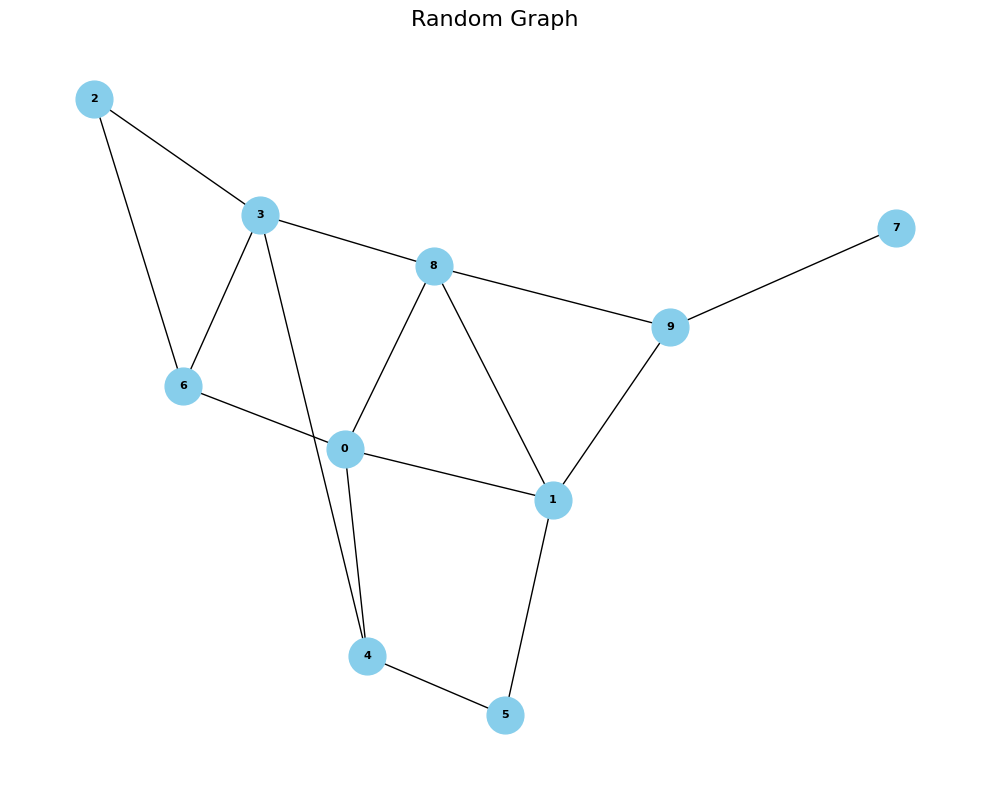

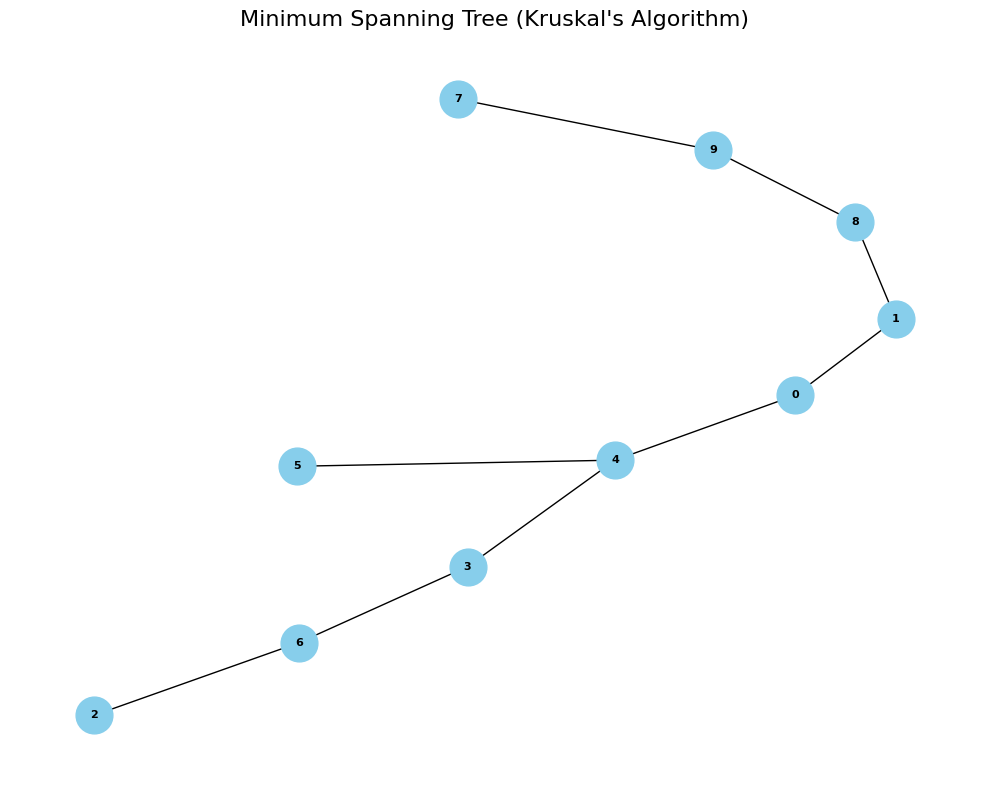

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def visualize_graph(graph, title):
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 8))

    # Draw the graph
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_size=700,
            node_color="skyblue", font_size=8, font_color="black", ax=ax)

    # Set the title and adjust the layout
    ax.set_title(title, fontsize=16)
    plt.tight_layout()

    # Display the graph
    plt.show()

def visualize_mst(graph, mst_edges, title):
    # Create a new graph with only the MST edges
    mst_graph = nx.Graph()
    mst_graph.add_nodes_from(graph.nodes())
    mst_graph.add_weighted_edges_from(mst_edges)

    # Visualize the MST graph
    visualize_graph(mst_graph, title)

def kruskal_algorithm(graph):
    edges = sorted([(u, v, data['weight']) for u, v, data in graph.edges(data=True)], key=lambda x: x[2])
    mst = []
    uf = {node: node for node in graph.nodes}
    for edge in edges:
        u, v, weight = edge
        if uf[u] != uf[v]:
            mst.append((u, v, weight))
            old_group, new_group = uf[u], uf[v]
            for node, group in uf.items():
                if group == old_group:
                    uf[node] = new_group
    return mst

# Generate a random graph
graph = nx.gnm_random_graph(10, 15, seed=42)

# Add some weights to the edges
for u, v in graph.edges():
    graph[u][v]['weight'] = random.randint(1, 10)

# Run Kruskal's algorithm
mst_edges = kruskal_algorithm(graph)

# Visualize the random graph
visualize_graph(graph, "Random Graph")

# Visualize the minimum spanning tree
visualize_mst(graph, mst_edges, "Minimum Spanning Tree (Kruskal's Algorithm)")
